# [データサイエンス講座(統計編)](https://datawokagaku.com/category/%e8%ac%9b%e5%ba%a7%e4%b8%80%e8%a6%a7/%e3%83%87%e3%83%bc%e3%82%bf%e3%82%b5%e3%82%a4%e3%82%a8%e3%83%b3%e3%82%b9%e8%ac%9b%e5%ba%a7%e7%b5%b1%e8%a8%88%e7%b7%a8/)

## 2

In [1]:
#算術平均(arithmetic mean)
import numpy as np
apple_weights = [295, 300, 300, 310, 311]
np.mean(apple_weights)

303.2

In [2]:
#幾何平均(geometric mean)
from scipy import stats
salay_growth = [1.05, 1.1, 1.3]
salaly_growth_maen = stats.gmean(salay_growth)
salaly_growth_maen

1.1450956868476592

In [3]:
#調和平均(harmonic mean)
velocities = [20, 60]
velocities_mean = stats.hmean(velocities)
velocities_mean

30.0

In [4]:
#偏差(算術平均からの差)の合計は常に0になる
apple_weights = [295, 300, 300, 310, 311]
apple_w_mean = np.mean(apple_weights)
deviations = apple_weights - apple_w_mean
deviations.sum()

5.684341886080802e-14

## 3 

In [5]:
import time

randoms = np.random.randn(10**7)
before_time = time.time()
mean = np.mean(randoms)
after_time = time.time()

print('mean is {} (time:{:.2f}s)'.format(mean, after_time-before_time))

mean is -0.0002836435420810514 (time:0.00s)


In [6]:
randoms = np.random.randn(10**7)
before_time = time.time()
median = np.median(randoms)
after_time = time.time()

print('median is {} (time:{:.2f}s)'.format(median, after_time-before_time))

median is -0.0001894678414787284 (time:0.11s)


In [7]:
from scipy import stats
mode, count = stats.mode([6, 2, 4, 5, 1, 3, 5, 3, 4])
print(mode)
print(count)

[3]
[2]


## 4

IQR: 22.0
QD: 11.0


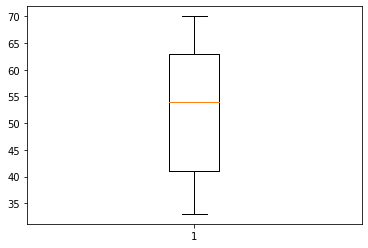

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

data = [33, 35, 36, 39, 43, 49, 51, 54, 54, 56, 62, 64, 64, 69, 70]

iqr = stats.iqr(data)
qd = iqr/2
print('IQR: {}'.format(iqr))
print('QD: {}'.format(qd))

plt.boxplot(data)
plt.show()

## 5 

In [9]:
def get_variance(samples):
    mean = np.mean(samples)
    deviations = samples - mean
    square_diviations = deviations * deviations
    sum_square_diviations = np.sum(square_diviations)
    variance = sum_square_diviations/len(samples)
    return variance

In [10]:
samples = [10, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20]
get_variance(samples)

11.537190082644628

In [11]:
np.var(samples)

11.537190082644628

In [12]:
np.sqrt(get_variance(samples))

3.3966439440489826

In [13]:
np.std(samples)

3.3966439440489826

scipy, pandas で求めると不偏分散が計算される

In [14]:
stats.tvar(samples)

12.690909090909091

In [15]:
stats.tstd(samples)

3.562430222602134

## 6

In [16]:
population = np.array([1, 5, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20, 25, 30])
# ランダムに値を抽出
samples = np.random.choice(population, size=3)
print('population variance is {}'.format(np.var(population)))
print('sample variance is {}'.format(np.var(samples)))
print('samples: {}'.format(samples))

population variance is 51.392857142857146
sample variance is 2.8888888888888893
samples: [15 14 18]


(-4.141892414908566, 4.641383716810065, 0.0, 1120.35)

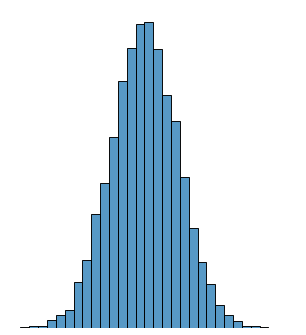

In [17]:
import seaborn as sns
sns.displot(np.random.randn(int(1e4)), bins=30)
plt.axis("off")

## 7

In [18]:
population = np.array([1, 5, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20, 25, 30])
samples = np.random.choice(population, size=5)

print('population mean is {}'.format(np.mean(population)))
print('sample mean is {}'.format(np.mean(samples)))
print('samples: {}'.format(samples))

population mean is 15.5
sample mean is 14.8
samples: [10 14 18 16 16]


In [19]:
population = np.array([1, 5, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20, 25, 30])
print('population mean is {}'.format(np.mean(population)))

sample_mean_list = []
count = 10000

for i in range(count):
    samples = np.random.choice(population, size=5)
    sample_mean_list.append(np.mean(samples))

print('sample_mean_list mean is {}'.format(np.mean(sample_mean_list)))

population mean is 15.5
sample_mean_list mean is 15.502720000000002


In [20]:
population = np.array([1, 5, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20, 25, 30])
print('population std is {}'.format(np.std(population)))

sample_std_list = []
sample_unbiased_list = []
count = 10000

for i in range(count):
    samples = np.random.choice(population, size=5)
    sample_std_list.append(np.std(samples))
    sample_unbiased_list.append(stats.tstd(samples))

print('sample_std_list mean is {}'.format(np.mean(sample_std_list)))
print('sample_unbiased_list mean is {}'.format(np.mean(sample_unbiased_list)))

population std is 7.168881163951398
sample_std_list mean is 5.94796664106388
sample_unbiased_list mean is 6.650028868659964


母集団の分散に対して、標本分散は小さくなる。

なので、母集団の分散の不偏推定量は、標本分散より大きくなる不偏分散を使う。

## 8

* 範囲は最大値，最小値を使うので外れ値に弱い
* IQR,QDは外れ値には強いですが全てのデータを計算に使うわけではないので信頼度は低い．
* そこで考えられたのが平均偏差
* 絶対値の扱いが厄介なので，２乗することにしたのが分散．
* ２乗すると値の尺度が変わるのでそれを直したのが，分散の平方根をとった標準偏差．
* 母集団の分散の推定をする場合は不偏分散．

In [21]:
# randoms = np.random.randn(1000)
randoms = np.random.rand(1000)

mean = np.mean(randoms)
std = np.std(randoms)

count = 0
coef = 1
thresh = coef*std
for num in randoms:
    if num>mean-thresh and num<mean+thresh:
        count += 1
print('{}% of the numbers are included within mean±{}std'.format(int(count/len(randoms)*100), coef))

55% of the numbers are included within mean±1std


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


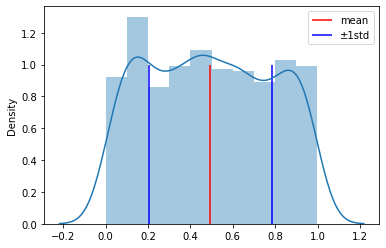

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(randoms)
plt.vlines(mean, 0, 1, "r", label="mean")
plt.vlines(mean+coef*std, 0, 1, "b", label='±{}std'.format(coef))
plt.vlines(mean-coef*std, 0, 1, 'b')
plt.legend()

正規分布でちょうど95%の範囲: 平均±1.96標準偏差

## 9

標準化(standardize)

In [23]:
data = [0, 10, 20, 25, 27, 30, 43, 56, 68, 70]
mean = np.mean(data)
std = np.std(data)

z = (data-mean) / std
print('standardized data(z): {}'.format(z))
print('mean: {:.2f}'.format(np.mean(z)))
print('std: {}'.format(np.std(z)))

standardized data(z): [-1.54799532 -1.10444365 -0.66089199 -0.43911615 -0.35040582 -0.21734032
  0.35927685  0.93589402  1.46815602  1.55686636]
mean: 0.00
std: 1.0


In [24]:
from sklearn.preprocessing import StandardScaler

data = np.array([0, 10, 20, 25, 27, 30, 43, 56, 68, 70])
print('data shape: {}'.format(data.shape))

data = np.expand_dims(data, axis=-1)
print('reshaped data shape: {}'.format(data.shape))

scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

data shape: (10,)
reshaped data shape: (10, 1)
[[-1.54799532]
 [-1.10444365]
 [-0.66089199]
 [-0.43911615]
 [-0.35040582]
 [-0.21734032]
 [ 0.35927685]
 [ 0.93589402]
 [ 1.46815602]
 [ 1.55686636]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


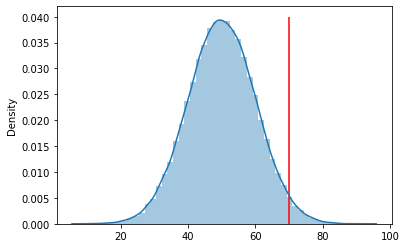

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

samples = np.random.randn(100000)
tscore = samples*10 +50
sns.distplot(tscore)
plt.vlines(70, 0, 0.04, "r")

## 10

共分散は分散の2変数バージョン. ２変数の相関関係を表すのに使われる指標

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'height')

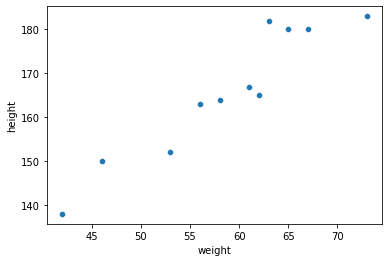

In [26]:
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

sns.scatterplot(weight, height)
plt.xlabel("weight")
plt.ylabel("height")

In [27]:
np.cov(weight, height)

array([[ 82.81818182, 127.54545455],
       [127.54545455, 218.76363636]])

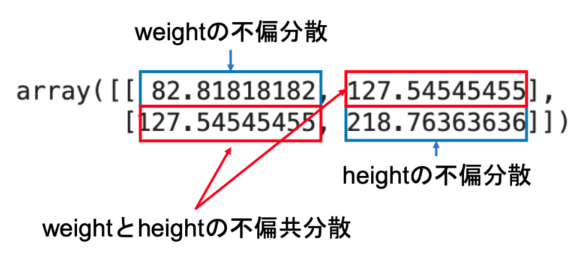

In [28]:
np.cov(weight, height, bias=True)

array([[ 75.2892562 , 115.95041322],
       [115.95041322, 198.87603306]])

In [29]:
import pandas as pd
df = pd.DataFrame({"weight":weight, "height":height})
df

,weight,height
0,42,138
1,46,150
2,53,152
3,56,163
4,58,164
5,61,167
6,62,165
7,63,182
8,65,180
9,67,180


In [30]:
df.cov()

,weight,height
weight,82.818182,127.545455
height,127.545455,218.763636


## 11

相関係数

In [31]:
import numpy as np
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

r = np.corrcoef(weight, height)
r

array([[1.        , 0.94757714],
       [0.94757714, 1.        ]])

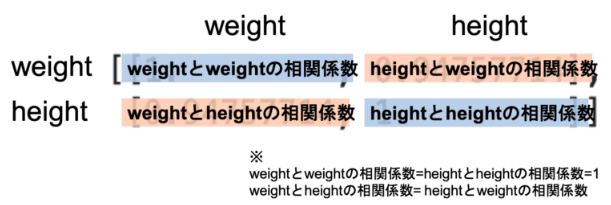

In [32]:
import pandas as pd
df = pd.DataFrame({"weight":weight, "height":height})
df.corr()

,weight,height
weight,1.000000,0.947577
height,0.947577,1.000000


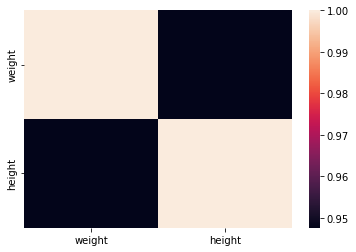

In [33]:
import seaborn as sns
sns.heatmap(df.corr())

## 12

In [34]:
import numpy as np

def generate_values(r=0.5, num=1000):
    a = np.random.randn(num)
    e1 = np.random.randn(num)
    e2 = np.random.randn(num)

    if r<0:
        r = -r
        x = -np.sqrt(r)*a - np.sqrt(1-r)*e1
    else:
        x = np.sqrt(r)*a - np.sqrt(1-r)*e1
    
    y = np.sqrt(r)*a + np.sqrt(1-r)*e2
    actual_r = np.corrcoef(x, y)[0][1]

    return x, y, actual_r

Text(0.5, 1.0, 'r=0.51')

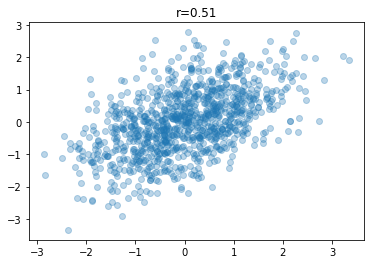

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y, actual_r = generate_values()
plt.scatter(x, y, alpha=0.3)
plt.title('r={:0.2f}'.format(actual_r))

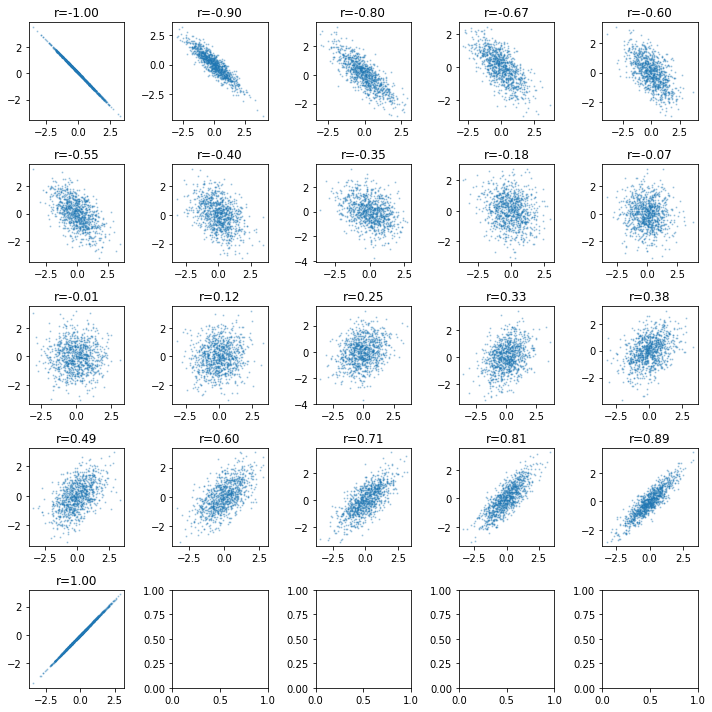

In [36]:
rows = 5
cols = 5
figsize = (10, 10)
fig, ax = plt.subplots(rows, cols, figsize=figsize)

for idx, r in enumerate(np.arange(-1, 1.1, 0.1)):
    row_i = idx//cols
    col_i = idx%cols
    x, y, actual_r = generate_values(r=r)

    title = 'r={:.2f}'.format(actual_r)
    ax[row_i, col_i].set_title(title)
    ax[row_i, col_i].scatter(x, y, alpha=0.3, s=1)
# タイトルや軸が重なってしまうのを防ぐ
fig.tight_layout()

r=0.95 (before adding outlier)
r=-0.09 (after adding outlier)


Text(0, 0.5, 'height')

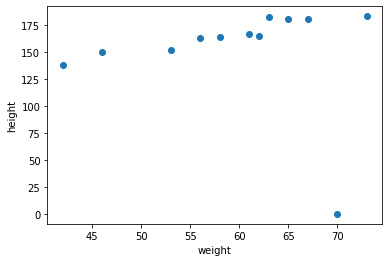

In [37]:
import numpy as np
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

r = np.corrcoef(weight, height)[0][1]
print('r={:.2f} (before adding outlier)'.format(r))

weight = np.append(weight, 70)
height = np.append(height, 0)
r = np.corrcoef(weight, height)[0][1]
print('r={:.2f} (after adding outlier)'.format(r))

plt.scatter(weight, height)
plt.xlabel("weight")
plt.ylabel("height")

## 13 回帰

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


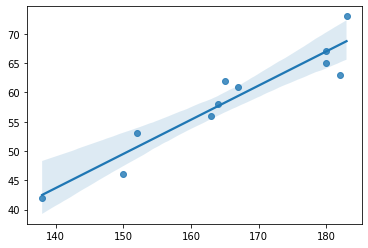

In [38]:
import numpy as np
import seaborn as sns
%matplotlib inline
 
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

sns.regplot(height, weight)

## 14

Text(0, 0.5, 'weight')

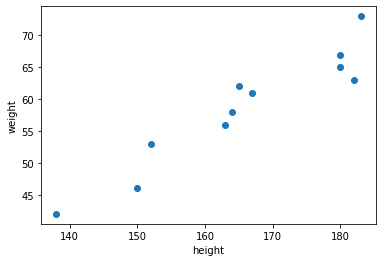

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

plt.scatter(height, weight)
plt.xlabel("height")
plt.ylabel("weight")

Text(0, 0.5, 'weight')

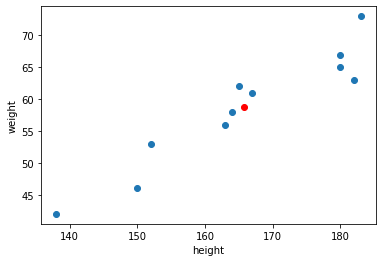

In [40]:
plt.scatter(height, weight)
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'weight')

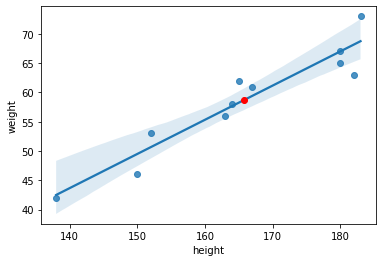

In [41]:
sns.regplot(height, weight)
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

In [42]:
from sklearn.linear_model import LinearRegression

X = np.expand_dims(height, axis=-1)
y = weight
reg = LinearRegression()
reg.fit(X, y)

print("b={}".format(reg.coef_))
print("a={}".format(reg.intercept_))

b=[0.58302859]
a=-37.94946808510644


In [43]:
s_x = np.std(height)
s_y = np.std(weight)

mean_x = np.mean(height)
mean_y = np.mean(weight)

r = np.corrcoef(weight, height)[0][1]
b = r * s_y/s_x
a = mean_y - b*mean_x

print("b={}".format(b))
print("a={}".format(a))

b=0.5830285904255318
a=-37.94946808510635


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'weight')

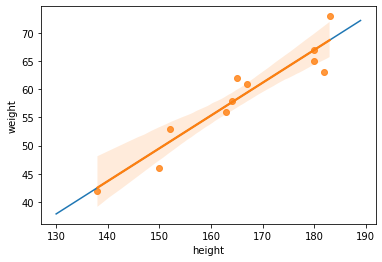

In [44]:
x = np.arange(130, 190, 1)
plt.plot(x, b*x+a)

sns.regplot(height, weight)
plt.xlabel('height')
plt.ylabel('weight')

In [45]:
X = np.array([[175]])
y = reg.predict(X)
print(X, y)

[[175]] [64.08053524]


## 15
𝑥から𝑦を予測する回帰直線の式を，𝑦から𝑥を予測する際には使えない

Text(0, 0.5, 'weight')

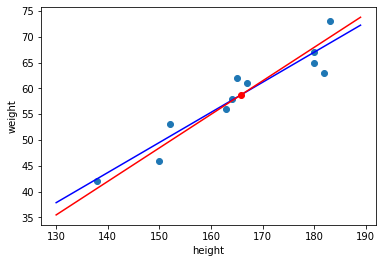

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])
 
# reg1: heightからweightを予測する回帰直線
X = np.expand_dims(height, axis=-1)
y = weight
reg1 = LinearRegression()
reg1.fit(X, y)
 
# reg2: weightからheightを予測する回帰直線
X = np.expand_dims(weight, axis=-1)
y = height
reg2 = LinearRegression()
reg2.fit(X, y)
 
# 直線を描画するためのx軸の値リストを作成
x = np.arange(130, 190, 1)
# 学習に使った値を散布図で描画
plt.scatter(height, weight)
# reg1を描画
plt.plot(x, x*reg1.coef_+reg1.intercept_, 'b')
# reg2を描画(x=a'+b'yを変形し，y=(x-a')/b')となることに注意
plt.plot(x, (x-reg2.intercept_)/reg2.coef_, 'r')
#reg1とreg2が交差している点がweightとheightの平均の点
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

## 17 決定係数
説明変数がどれだけ目的変数を説明しているか

決定係数が高い＝回帰直線がデータによく当てはまっている

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

X = np.expand_dims(height, axis=-1)
y = weight

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [48]:
weight_test = np.array([43, 45, 50, 58, 58, 60, 66, 63, 65, 70, 72])
height_test = np.array([140, 148, 152, 163, 160, 170, 163, 177, 177, 185, 180])

X_test = np.expand_dims(height_test, axis=-1)
y_test_pred = reg.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2_score(weight_test, y_test_pred)

0.8586682113144612

## 18 二項分布

In [50]:
from scipy.stats import binom
data_binom = binom.rvs(n=3, p=1/6, size=2160)

In [51]:
data_binom

array([1, 1, 0, ..., 1, 1, 0])

In [52]:
u, counts = np.unique(data_binom, return_counts=True)
print(u)
print(counts)

[0 1 2 3]
[1205  814  130   11]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


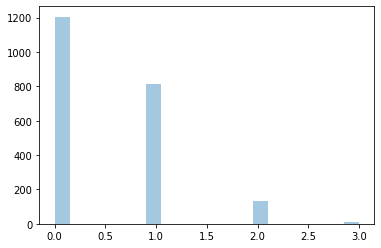

In [53]:
import seaborn as sns
%matplotlib inline

sns.distplot(data_binom, kde=False)

## 20 ポワソン分布

In [54]:
from scipy.stats import poisson
import math
import numpy as np

mu = 30
k = 40
p1 = poisson.pmf(k=k, mu=mu)
p2 = (mu**k * np.e**(-mu)) / math.factorial(k)
print(p1, p2)

0.013943463479967897 0.013943463479967761


Text(0, 0.5, 'probability')

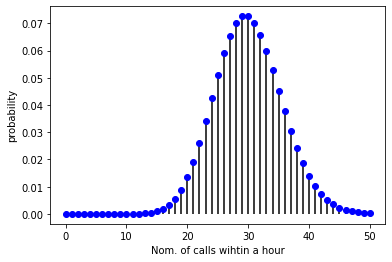

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(51)
plt.plot(x, poisson.pmf(k=x, mu=mu), "bo")
plt.vlines(x, 0, poisson.pmf(k=x, mu=mu))
plt.xlabel("Nom. of calls wihtin a hour")
plt.ylabel("probability")

Text(0, 0.5, 'probability')

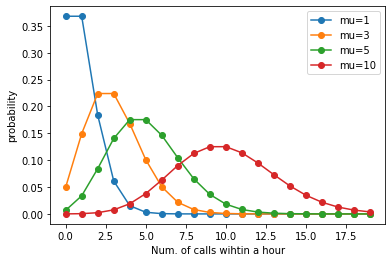

In [56]:
x = np.arange(20)
mu_list = [1, 3, 5, 10]

for idx, mu in enumerate(mu_list):
    plt.plot(x, poisson.pmf(k=x, mu=mu), "o-", label="mu={}".format(mu))

plt.legend()
plt.xlabel("Num. of calls wihtin a hour")
plt.ylabel("probability")

## 21 幾何分布、指数分布

Text(0, 0.5, 'probability')

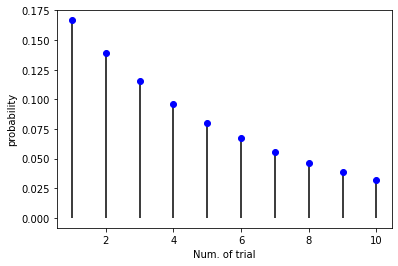

In [57]:
from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(1, 11)
y = geom.pmf(k=x, p=1/6)
plt.plot(x, y, "bo")
plt.vlines(x, 0, y)
plt.xlabel("Num. of trial")
plt.ylabel("probability")

Text(0, 0.5, 'probability density')

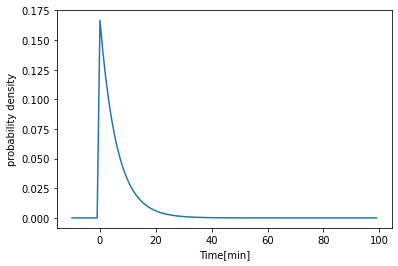

In [58]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-10, 100)
y = expon.pdf(x=x, scale=6)
plt.plot(x, y)
plt.xlabel("Time[min]")
plt.ylabel("probability density")

## 22 正規分布

Text(0, 0.5, 'probability')

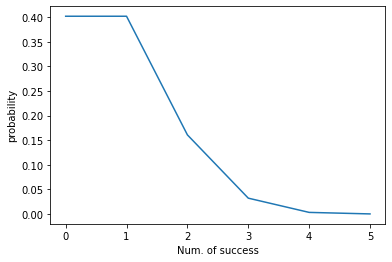

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import binom

n = 5
p = 1/6
x = np.arange(n+1)
y = binom.pmf(k=x, p=p, n=n)
plt.plot(x, y)
plt.xlabel("Num. of success")
plt.ylabel("probability")

Text(0, 0.5, 'probability')

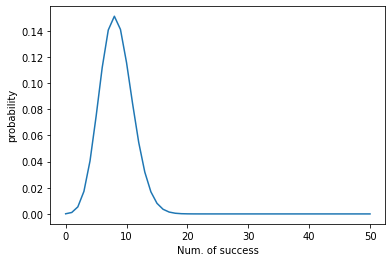

In [60]:
n = 50
p = 1/6
x = np.arange(n+1)
y = binom.pmf(k=x, p=p, n=n)
plt.plot(x, y)
plt.xlabel("Num. of success")
plt.ylabel("probability")

Text(0, 0.5, 'probability density')

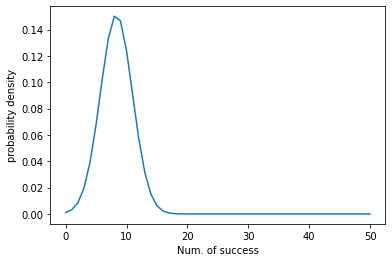

In [61]:
from scipy.stats import norm
n = 50
mu = n*p
std = np.sqrt(n*p*(1-p))

x = np.arange(n+1)
y = norm.pdf(x=x, loc=mu, scale=std)
plt.plot(x, y)
plt.xlabel("Num. of success")
plt.ylabel("probability density")

## 23 母比率の推定

nが大きければ正規分布に近似される：scipy.stats.norm

実装する時は正規分布ではなく二項分布を使った方が間違いない：scipy.stats.binorm

*  alpha: 信頼区間(95%なら0.95)
*  n: 標本の大きさ(試行回数.今回なら1000)
*  p: 標本比率(60%なら0.6)



In [62]:
from scipy.stats import binom
stats.binom.interval(0.95, n=1000, p=0.6)

(570.0, 630.0)

In [63]:
from scipy.stats import norm
stats.norm.interval(alpha=0.95, loc=1000*0.6, scale=(1000*0.6*0.4)**0.5)

(569.6363685148401, 630.3636314851599)

## 25 母平均の推定

中心極限定理：母集団の分布がどんな分布であろうと、𝑛を大きくすると標本平均の標本分布は正規分布になる

In [64]:
import pandas as pd
import seaborn as sns
%matplotlib inline
 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle_income.csv', encoding="ISO-8859-1")

In [65]:
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


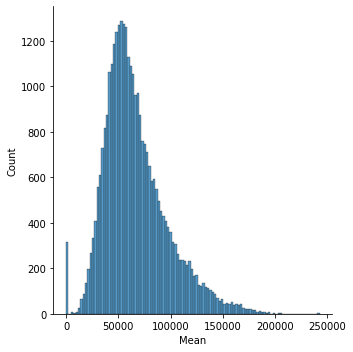

In [66]:
sns.displot(df["Mean"])

In [67]:
import numpy as np
np.mean(df['Mean'])

66703.98604193568

In [68]:
n = 1000
sample_df = df.sample(n=n)

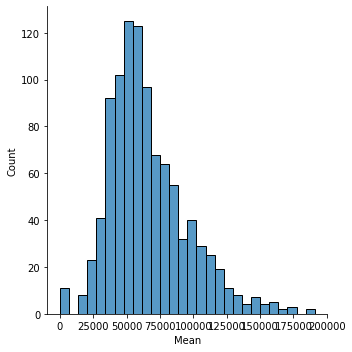

In [69]:
sns.displot(sample_df["Mean"])

In [70]:
#標本平均
np.mean(sample_df["Mean"])

66033.558

In [71]:
from scipy import stats
sample_mean = np.mean(sample_df["Mean"])
sample_var = stats.tvar(sample_df["Mean"])
stats.norm.interval(alpha=0.95, loc=sample_mean, scale=np.sqrt(sample_var/n))

(64207.48793988021, 67859.62806011981)

## 26 t分布で区間推定

母分散未知の母平均の推定

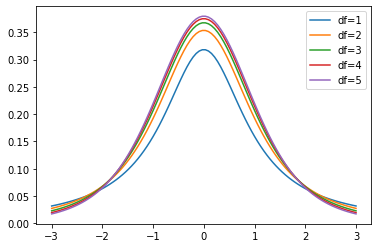

In [72]:
import numpy
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

x = np.linspace(-3, 3, 100)
for df in range(1, 6):
    t = stats.t.pdf(x, df)
    plt.plot(x, t, label=f"df={df}")
plt.legend()

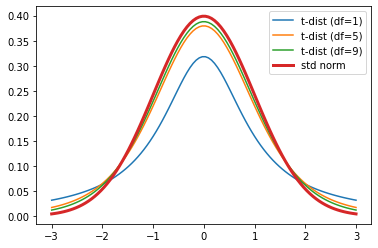

In [73]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x, loc=0, scale=1)

for df in range(1, 10, 4):
    t = stats.t.pdf(x, df)
    plt.plot(x, t, label=f"t-dist (df={df})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

-1.959963984540054 1.959963984540054


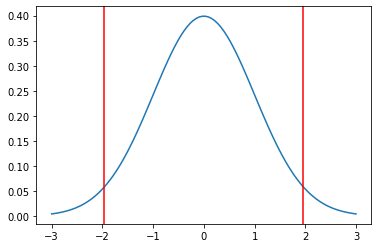

In [74]:
x = np.linspace(-3, 3, 100)
left, right = stats.norm.interval(0.95, loc=0, scale=1)
z = stats.norm.pdf(x, loc=0, scale=1)

plt.plot(x, z)
plt.axvline(left, c="r")
plt.axvline(right, c="r")
print(left, right)

-4.302652729911275 4.302652729911275


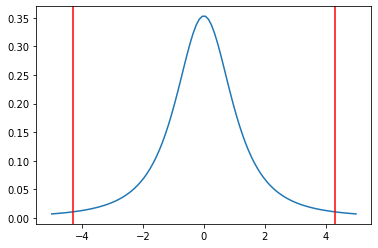

In [75]:
x = np.linspace(-5, 5, 100)
left, right = stats.t.interval(0.95, df=2)
t = stats.t.pdf(x, df=2)

plt.plot(x, t)
plt.axvline(left, c="r")
plt.axvline(right, c="r")
print(left, right)

-2.2281388519649385 2.2281388519649385


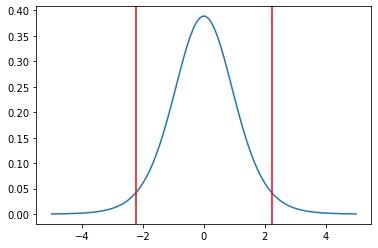

In [76]:
x = np.linspace(-5, 5, 100)
left, right = stats.t.interval(0.95, df=10)
t = stats.t.pdf(x, df=10)

plt.plot(x, t)
plt.axvline(left, c="r")
plt.axvline(right, c="r")
print(left, right)

In [77]:
import pandas as pd
import seaborn as sns
%matplotlib inline
 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle_income.csv', encoding="ISO-8859-1")

In [78]:
df["Mean"].mean()

66703.98604193568

In [79]:
n = 1000
sample_df = df.sample(n=n)

In [80]:
sample_df["Mean"].mean()

66234.049

In [81]:
from scipy import stats
sample_mean = sample_df["Mean"].mean()
sample_std = stats.tstd(sample_df["Mean"])
stats.t.interval(alpha=0.95, loc=sample_mean, scale=sample_std/np.sqrt(n), df=n-1)

(64351.16513145944, 68116.93286854055)

In [82]:
stats.norm.interval(alpha=0.95, loc=sample_mean, scale=sample_std/np.sqrt(n))

(64353.4463411338, 68114.65165886619)

## 27 仮説検定

## 28 母比率の差の検定

### statsmodels.stats.proption.propotions_ztest()

* const: 各標本のうち，興味のある現象が起きた個(回)数 
* nobs: それぞれの標本の数
* alternative: 両側検定なら‘two-sided’, 片側検定なら‘smaller’か‘larger’．
* 帰り値：z値、p値

In [83]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([5, 4], [100, 100], alternative="larger")

(0.34109634006443396, 0.3665155281999629)

## 29 第一種の過誤、第二種の過誤

第一種の過誤（α）: 帰無仮説が正しいのに、誤って帰無仮説を棄却してしまう確率

第二種の過誤（β）: 帰無仮説が正しくない、対立仮説が正しいのに、誤って帰無仮説を採択してしまう確率

## 30 検定力（検出力）

検定力（1-β）: 正しく帰無仮説を棄却し，対立仮説を成立できる確率

検定力を決める要因として有意水準，サンプルサイズ，効果量がある

効果量: 検定しようとしている標準化された２つの母集団の差

## 31 カイ二乗検定

連関の検定 = 独立性の検定

連関: 質的変数（カテゴリー変数）における相関

帰無仮説：差はない、連関はない、独立である

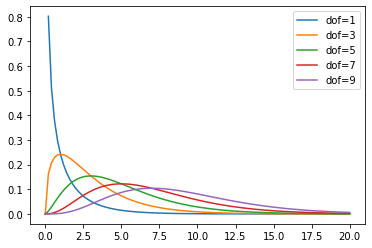

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
%matplotlib inline

x = np.linspace(0, 20, 100)
for df in range(1, 10, 2):
    y = chi2.pdf(x, df=df)
    plt.plot(x, y, label=f"dof={df}")
plt.legend()

カイ二乗値、p値、自由度、期待度数の行列

In [85]:
from scipy.stats import chi2_contingency
obs = [[25, 15],
       [5, 55]]
chi2_contingency(obs, correction=False)

(33.53174603174603, 7.0110272972619556e-09, 1, array([[12., 28.],
        [18., 42.]]))

### 比率の差の検定は，カイ二乗検定の自由度1のケース

しかし、カイ二乗検定は片側検定しかできないので、使う関数は分けた方が良い

In [86]:
from scipy.stats import chi2_contingency
obs = [[95, 5], [96, 4]]
chi2_contingency(obs, correction=False)

(0.11634671320535195, 0.7330310563999259, 1, array([[95.5,  4.5],
        [95.5,  4.5]]))

In [87]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([5, 4], [100, 100], alternative='two-sided')

(0.34109634006443396, 0.7330310563999258)

## 32 平均値の差の検定（t検定）

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
df= df.dropna()

In [91]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [92]:
ages1 = df[df["Survived"]==1]["Age"]
ages2 = df[df["Survived"]==0]["Age"]

In [93]:
print(ages1.mean(), ages2.mean())

32.905853658536586 41.35


### 独立した2群の平均値差の検定: statsモジュールのttest_ind()を使う

* a,b: それぞれの標本の実際のデータをリストやnumpy arrayにしたもの
* equal_var: booleanで，二つの母集団の分散が等しいとすればTrue，そうでなければFalse.
* alternative: 両側検定だったら "two-sided" ,片側検定の場合は "less" か "greater" を指定
* 戻り値は二つ: 検定統計量tの値とp値



In [94]:
stats.ttest_ind(ages1, ages2, alternative="less")

Ttest_indResult(statistic=-3.53435125095576, pvalue=0.0002594751653940836)

In [95]:
n1 = len(ages1)
n2 = len(ages2)

mean1 = ages1.mean()
mean2 = ages2.mean()

var1 = stats.tvar(ages1)
var2 = stats.tvar(ages2)

z = (mean1-mean2) / np.sqrt(var1/n1 + var2/n2)
print(f"z: {z}")

t = (mean1 - mean2) / (np.sqrt(((n1-1)*var1 + (n2-1)*var2)/(n1 + n2 -2)) * np.sqrt(1/n1 + 1/n2))
print(f't: {t}')

z: -3.4671799996491983
t: -3.5343512509557606


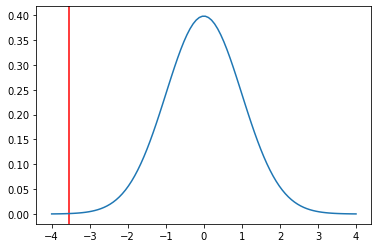

In [97]:
x = np.linspace(-4, 4, 100)
y = stats.t.pdf(x, df=n1+n2-2)

plt.axvline(t, c="r")
plt.plot(x, y)

In [98]:
# 赤い線の左側の面積：ｐ値は？
stats.t.cdf(t, n1+n2-2)

0.0002594751653940836

In [100]:
print(var1, var2)

221.71546053578567 247.73135593220334


### t検定（データの対応がない場合）の実施までの流れ
* 等分散性の検定
* 等分散性が言えたらt検定，言えなかったらウェルチのt検定（等分散ではなかった場合のt検定）
* 最近では，等分散性の検定をせずに，分散がどうであろうとウェルチのt検定をするという人も多い
    * ttest_ind() の equal_var 引数を False

In [101]:
stats.ttest_ind(ages1, ages2, alternative="less", equal_var=False)

Ttest_indResult(statistic=-3.4671799996491983, pvalue=0.00037406721468806855)

## 34 等分散性の検定（F検定）

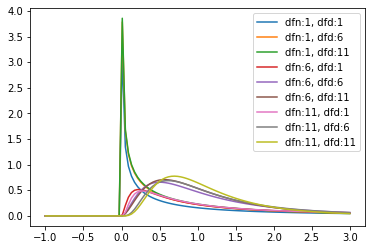

In [102]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y, label=f"dfn:{dfn}, dfd:{dfd}")
plt.legend()

In [103]:
import pandas as pd

df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
df = df.dropna()

In [105]:
ages1 = df[df['Survived']==1]['Age']
ages2 = df[df['Survived']==0]['Age']

statsにF検定の関数はないので、手順に従って計算していく

In [106]:
n1 = len(ages1)
n2 = len(ages2)
var1 = stats.tvar(ages1)
var2 = stats.tvar(ages2)
dfn = n2 -1
dfd = n1 -1

In [108]:
f = var2/var1
f

1.1173391126335939

In [110]:
stats.f.cdf(f, dfn=dfn, dfd=dfd)

0.6993173927448606

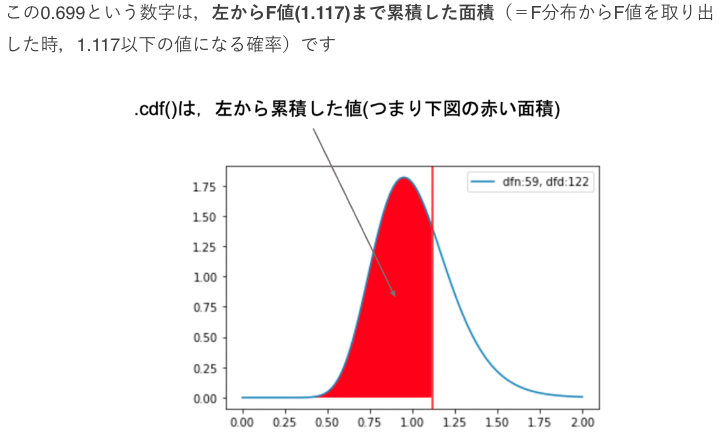

In [112]:
p = 1 - stats.f.cdf(f, dfn=dfn, dfd=dfd)
p

0.3006826072551394

### 正規性の検定：F検定は母集団が正規分布であることを前提にしている

In [113]:
stats.shapiro(ages1)

ShapiroResult(statistic=0.9874683022499084, pvalue=0.32029926776885986)

In [114]:
stats.shapiro(ages2)

ShapiroResult(statistic=0.9803863763809204, pvalue=0.44509851932525635)